In [1]:
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-lsokkp1h
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-lsokkp1h
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


In [2]:
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [3]:
CHECKPOINT_PATH='./sam_vit_h_4b8939.pth'

import torch
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [4]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor


sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)


mask_generator = SamAutomaticMaskGenerator(sam)

In [5]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.8,
    stability_score_thresh=0.9,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
)

In [6]:
# Import opencv package
import cv2

# Give the path of your image
IMAGE_PATH= './nike_shoes_2/mags01.jpg'
# Read the image from the path
image= cv2.imread(IMAGE_PATH)
# Convert to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Generate segmentation mask
output_mask = mask_generator.generate(image_rgb)
print(output_mask)

[{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 120787, 'bbox': [367, 166, 537, 337], 'predicted_iou': 1.0328991413116455, 'point_coords': [[390.625, 395.15625]], 'stability_score': 0.9745017290115356, 'crop_box': [0, 0, 1000, 562]}, {'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 315393, 'bbox': [0, 2, 999, 557], 'predicted_iou': 1.0170385837

In [58]:
# Import opencv package
import cv2

# Give the path of your image
IMAGE_PATH= './nike_shoes_2/mags01.jpg'
# Read the image from the path
image= cv2.imread(IMAGE_PATH)
# Convert to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Generate segmentation mask
output_mask2 = mask_generator_2.generate(image_rgb)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Function that inputs the output and plots image and mask
def show_output(result_dict,axes=None):
     if axes:
        ax = axes
     else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
     sorted_result = sorted(result_dict, key=(lambda x: x['area']),      reverse=True)
     # Plot for each segment area
     for val in sorted_result:
        mask = val['segmentation']
        img = np.ones((mask.shape[0], mask.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
            ax.imshow(np.dstack((img, mask*0.5)))

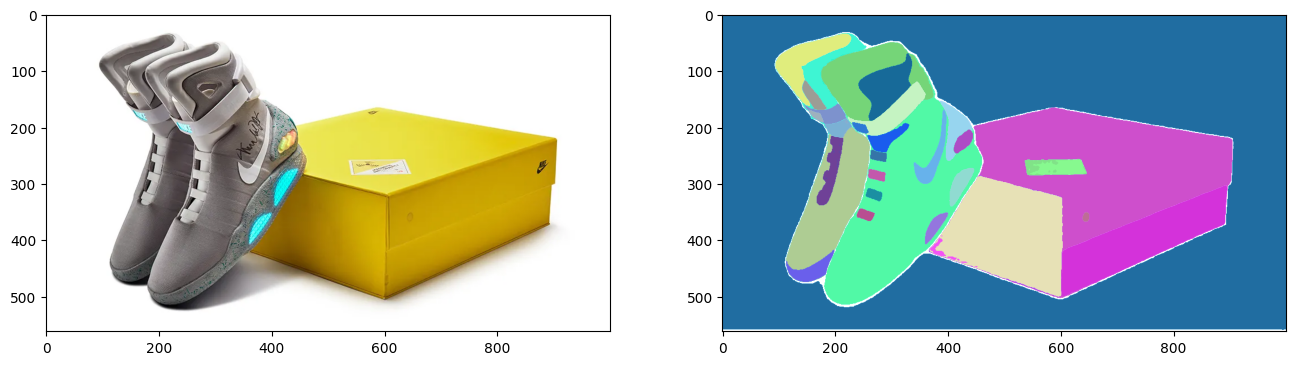

In [7]:
_,axes = plt.subplots(1,2, figsize=(16,16))
axes[0].imshow(image_rgb)
show_output(output_mask, axes[1])

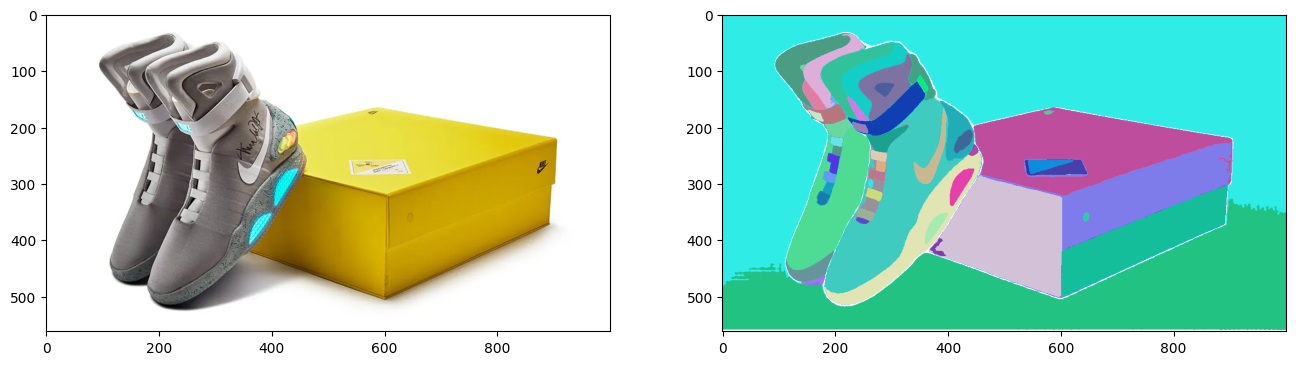

In [59]:
_,axes = plt.subplots(1,2, figsize=(16,16))
axes[0].imshow(image_rgb)
show_output(output_mask2, axes[1])

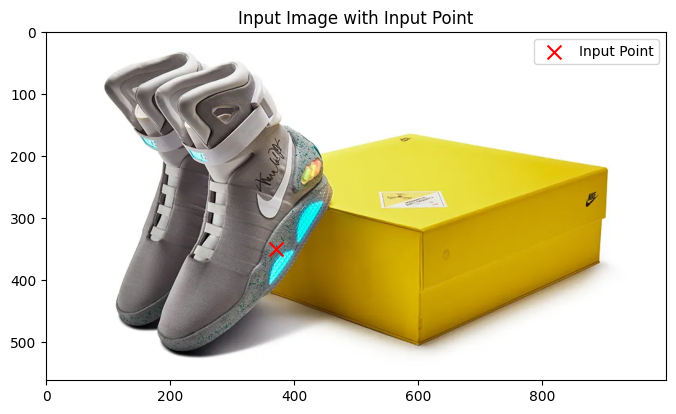

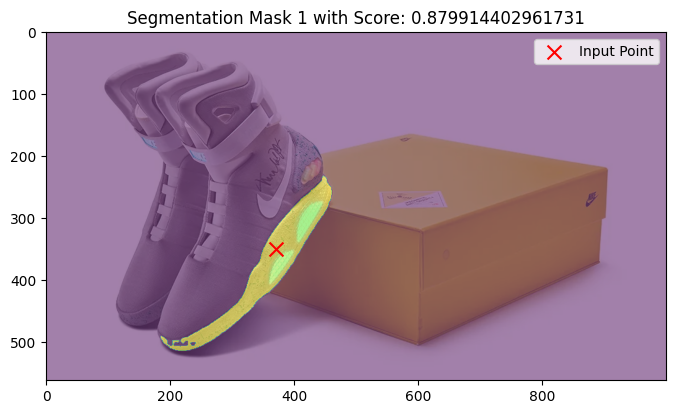

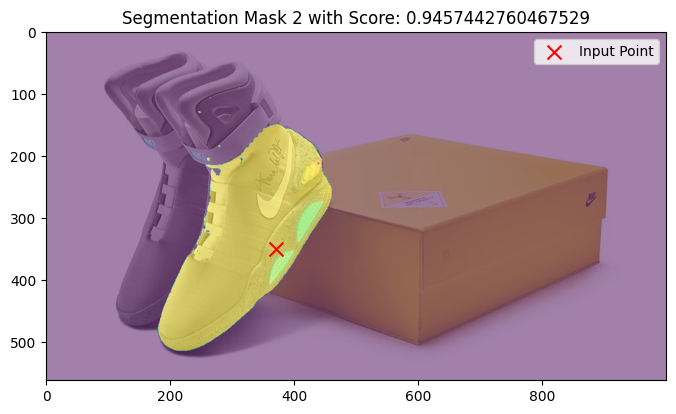

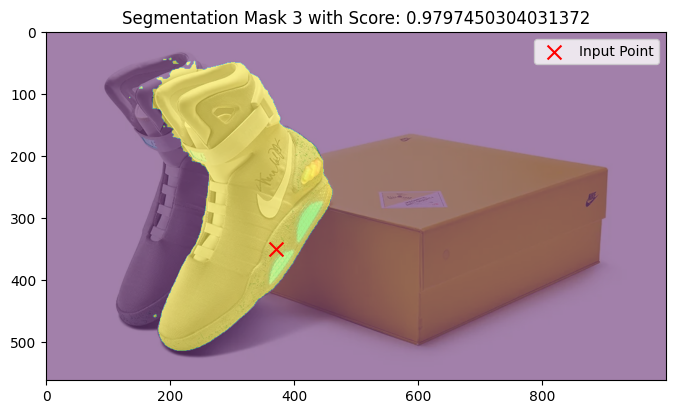

In [8]:
# Initialize the model with the input image
from segment_anything import sam_model_registry, SamPredictor
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)
mask_predictor = SamPredictor(sam)
mask_predictor.set_image(image_rgb)

# Provide points as input prompt [X,Y]-coordinates
input_point = np.array([[370, 350]])
input_label = np.array([1])


# Predict the segmentation mask at that point
masks, scores, logits = mask_predictor.predict(
point_coords=input_point,
point_labels=input_label,
multimask_output=True,
)

import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have 'image_rgb' loaded

# Visualize the input image
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.scatter(input_point[:, 0], input_point[:, 1], c='red', marker='x', s=100, label='Input Point')
plt.title('Input Image with Input Point')
plt.legend()
plt.show()

# Visualize each segmentation mask
for i, mask in enumerate(masks):
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb, alpha=0.7)
    plt.imshow(mask, cmap='viridis', alpha=0.5)
    plt.scatter(input_point[:, 0], input_point[:, 1], c='red', marker='x', s=100, label='Input Point')
    plt.title(f'Segmentation Mask {i + 1} with Score: {scores[i]}')
    plt.legend()
    plt.show()

In [9]:
semelle = masks[0]
semelle

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

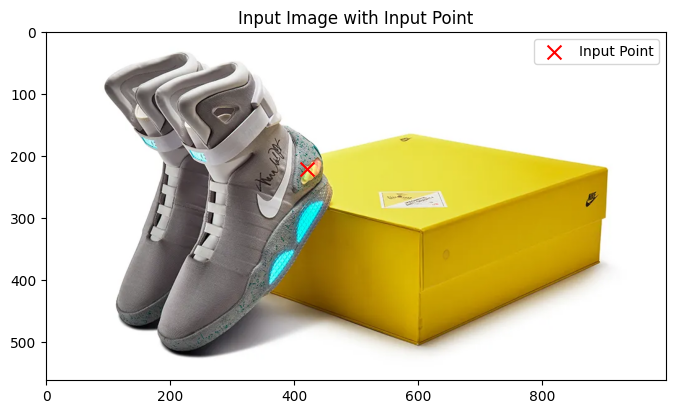

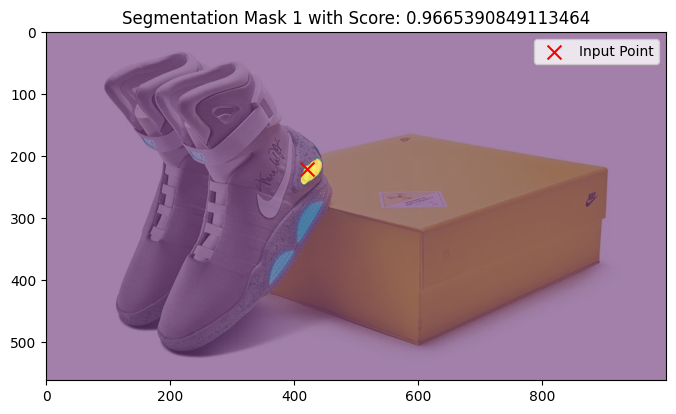

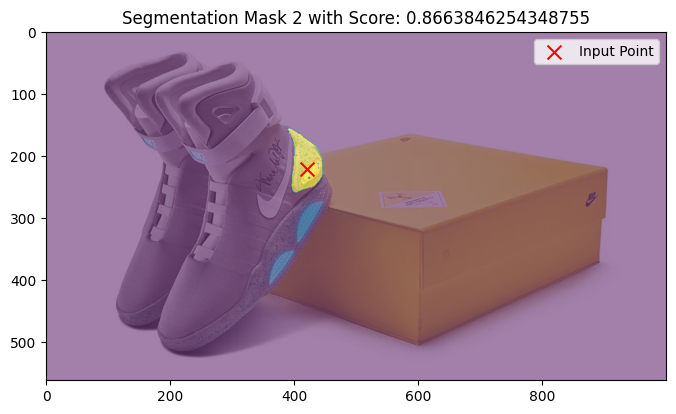

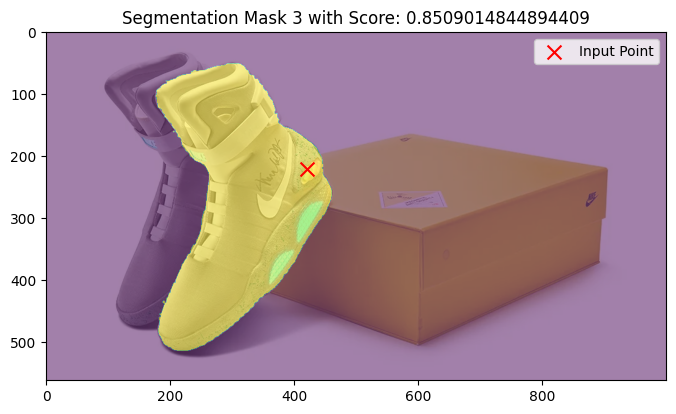

In [10]:
# Initialize the model with the input image
from segment_anything import sam_model_registry, SamPredictor
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)
mask_predictor = SamPredictor(sam)
mask_predictor.set_image(image_rgb)

# Provide points as input prompt [X,Y]-coordinates
input_point = np.array([[420, 220]])
input_label = np.array([1])


# Predict the segmentation mask at that point
masks, scores, logits = mask_predictor.predict(
point_coords=input_point,
point_labels=input_label,
multimask_output=True,
)

import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have 'image_rgb' loaded

# Visualize the input image
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.scatter(input_point[:, 0], input_point[:, 1], c='red', marker='x', s=100, label='Input Point')
plt.title('Input Image with Input Point')
plt.legend()
plt.show()

# Visualize each segmentation mask
for i, mask in enumerate(masks):
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb, alpha=0.7)
    plt.imshow(mask, cmap='viridis', alpha=0.5)
    plt.scatter(input_point[:, 0], input_point[:, 1], c='red', marker='x', s=100, label='Input Point')
    plt.title(f'Segmentation Mask {i + 1} with Score: {scores[i]}')
    plt.legend()
    plt.show()

In [11]:
talon = masks[1]
talon

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

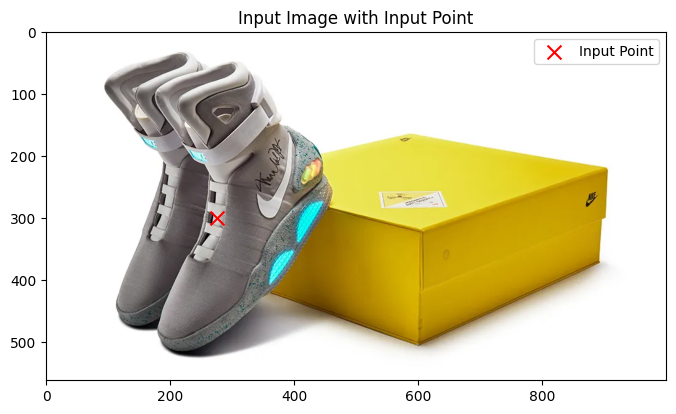

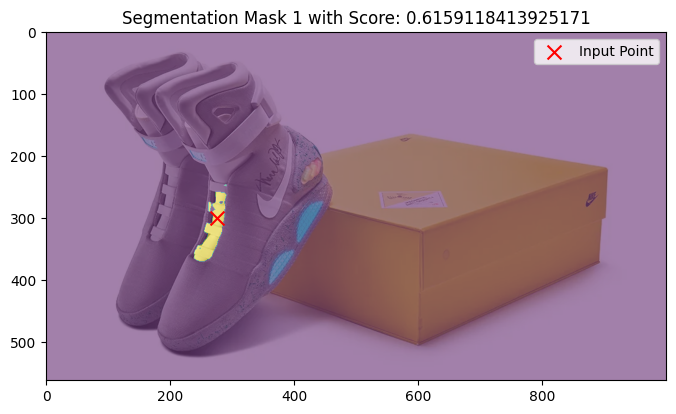

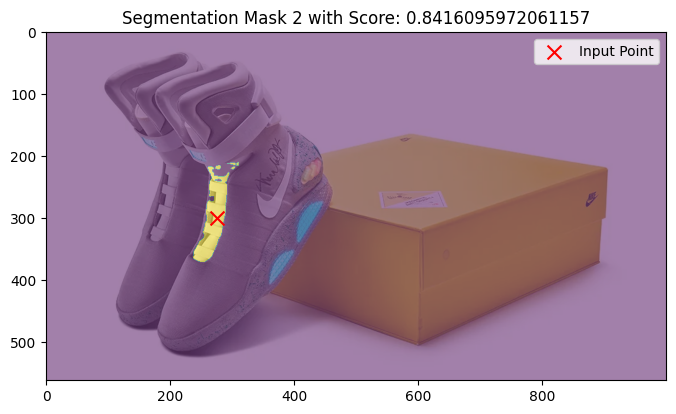

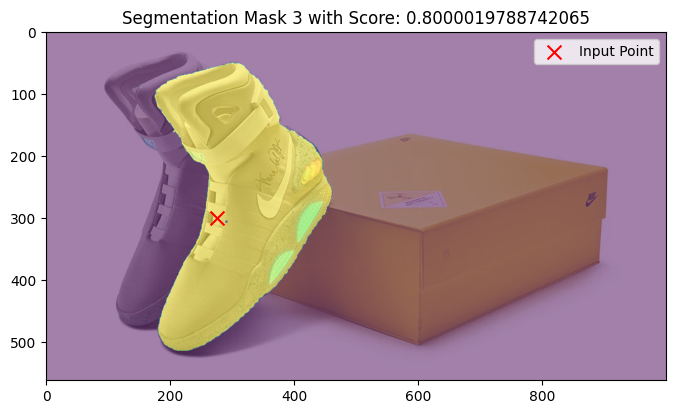

In [16]:
# Initialize the model with the input image
from segment_anything import sam_model_registry, SamPredictor
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)
mask_predictor = SamPredictor(sam)
mask_predictor.set_image(image_rgb)

# Provide points as input prompt [X,Y]-coordinates
input_point = np.array([[275, 300]])
input_label = np.array([1])


# Predict the segmentation mask at that point
masks, scores, logits = mask_predictor.predict(
point_coords=input_point,
point_labels=input_label,
multimask_output=True,
)

import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have 'image_rgb' loaded

# Visualize the input image
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.scatter(input_point[:, 0], input_point[:, 1], c='red', marker='x', s=100, label='Input Point')
plt.title('Input Image with Input Point')
plt.legend()
plt.show()

# Visualize each segmentation mask
for i, mask in enumerate(masks):
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb, alpha=0.7)
    plt.imshow(mask, cmap='viridis', alpha=0.5)
    plt.scatter(input_point[:, 0], input_point[:, 1], c='red', marker='x', s=100, label='Input Point')
    plt.title(f'Segmentation Mask {i + 1} with Score: {scores[i]}')
    plt.legend()
    plt.show()

In [17]:
lacets = masks[1]
lacets

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

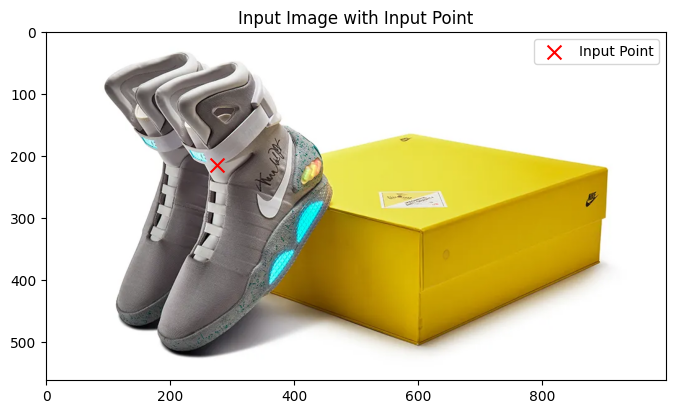

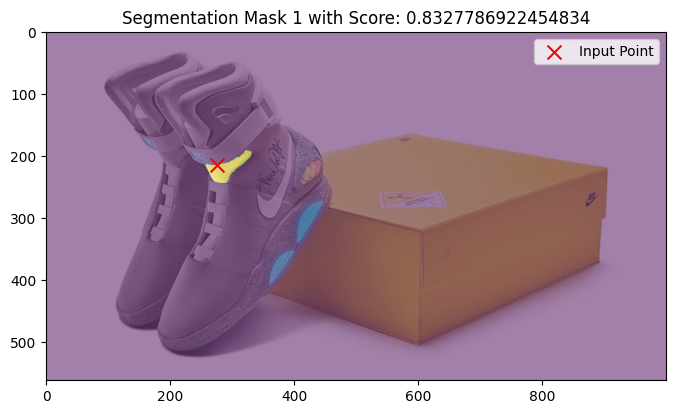

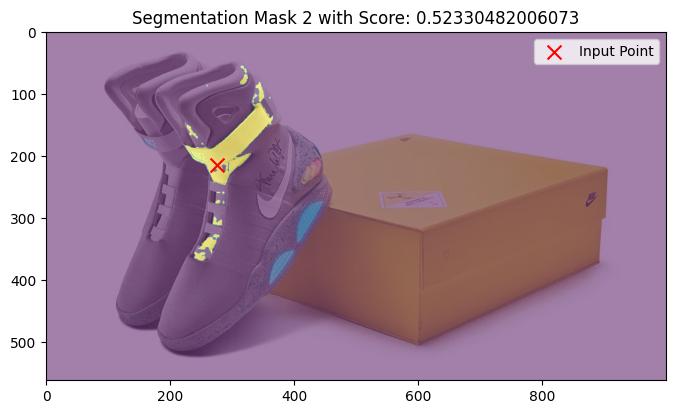

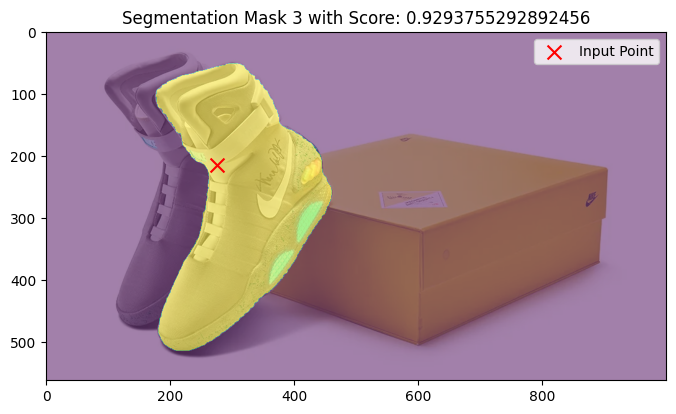

In [18]:
# Initialize the model with the input image
from segment_anything import sam_model_registry, SamPredictor
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)
mask_predictor = SamPredictor(sam)
mask_predictor.set_image(image_rgb)

# Provide points as input prompt [X,Y]-coordinates
input_point = np.array([[275, 215]])
input_label = np.array([1])


# Predict the segmentation mask at that point
masks, scores, logits = mask_predictor.predict(
point_coords=input_point,
point_labels=input_label,
multimask_output=True,
)

import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have 'image_rgb' loaded

# Visualize the input image
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.scatter(input_point[:, 0], input_point[:, 1], c='red', marker='x', s=100, label='Input Point')
plt.title('Input Image with Input Point')
plt.legend()
plt.show()

# Visualize each segmentation mask
for i, mask in enumerate(masks):
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb, alpha=0.7)
    plt.imshow(mask, cmap='viridis', alpha=0.5)
    plt.scatter(input_point[:, 0], input_point[:, 1], c='red', marker='x', s=100, label='Input Point')
    plt.title(f'Segmentation Mask {i + 1} with Score: {scores[i]}')
    plt.legend()
    plt.show()

In [19]:
lacets_plus = masks[0]
lacets_plus

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

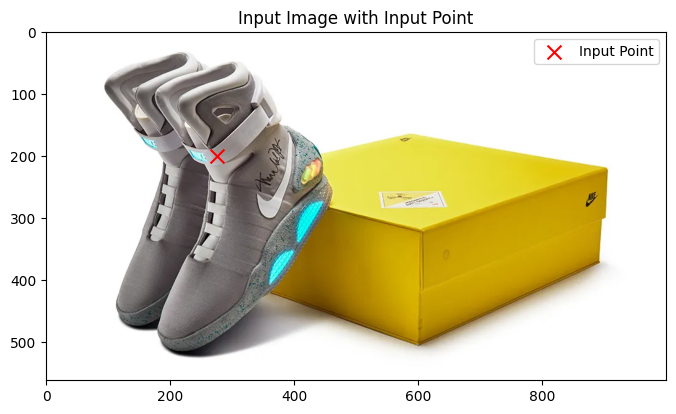

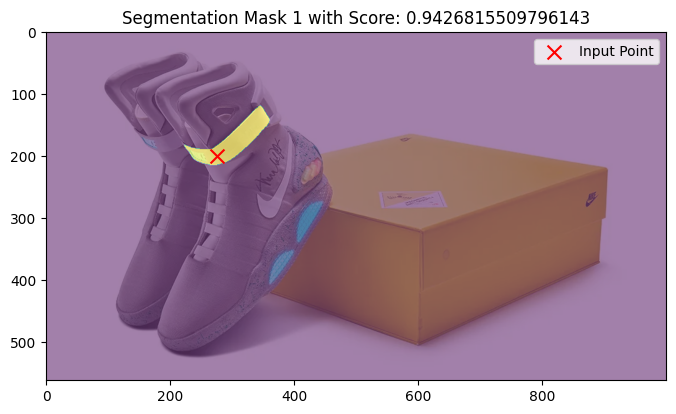

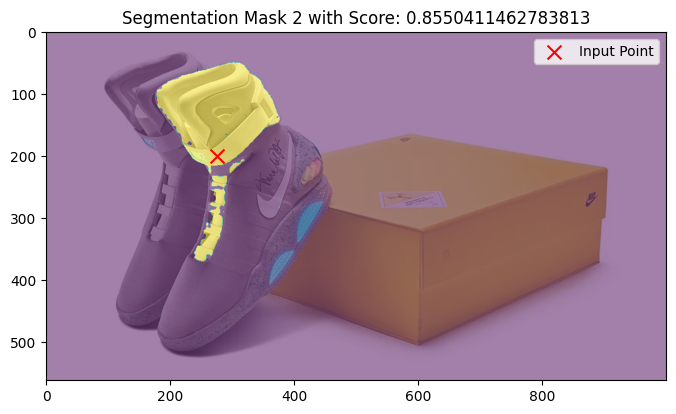

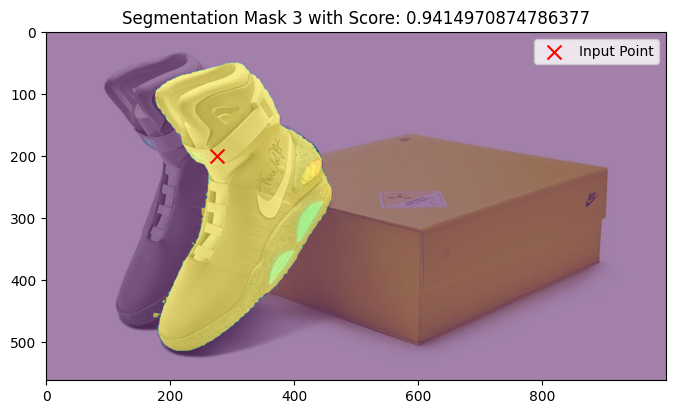

In [20]:
# Initialize the model with the input image
from segment_anything import sam_model_registry, SamPredictor
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)
mask_predictor = SamPredictor(sam)
mask_predictor.set_image(image_rgb)

# Provide points as input prompt [X,Y]-coordinates
input_point = np.array([[275, 200]])
input_label = np.array([1])


# Predict the segmentation mask at that point
masks, scores, logits = mask_predictor.predict(
point_coords=input_point,
point_labels=input_label,
multimask_output=True,
)

import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have 'image_rgb' loaded

# Visualize the input image
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.scatter(input_point[:, 0], input_point[:, 1], c='red', marker='x', s=100, label='Input Point')
plt.title('Input Image with Input Point')
plt.legend()
plt.show()

# Visualize each segmentation mask
for i, mask in enumerate(masks):
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb, alpha=0.7)
    plt.imshow(mask, cmap='viridis', alpha=0.5)
    plt.scatter(input_point[:, 0], input_point[:, 1], c='red', marker='x', s=100, label='Input Point')
    plt.title(f'Segmentation Mask {i + 1} with Score: {scores[i]}')
    plt.legend()
    plt.show()

In [21]:
languette = masks[0]
languette

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

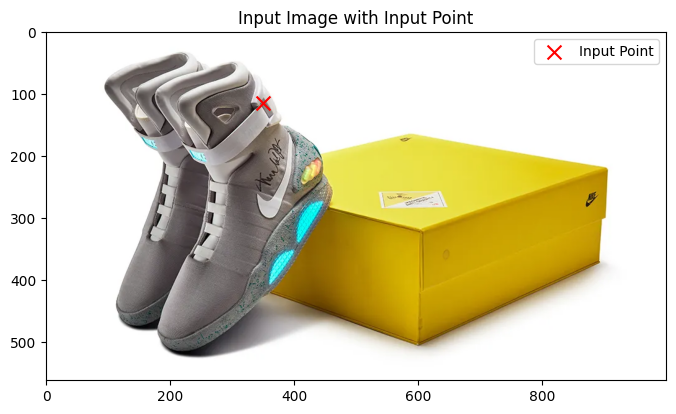

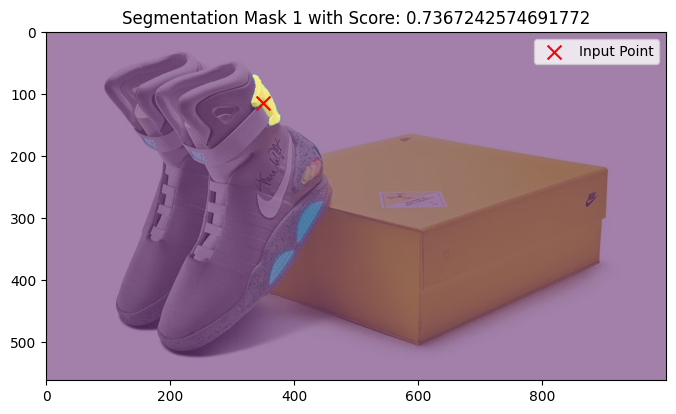

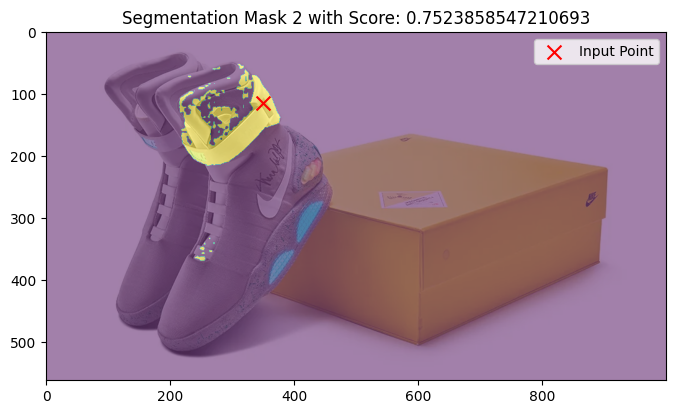

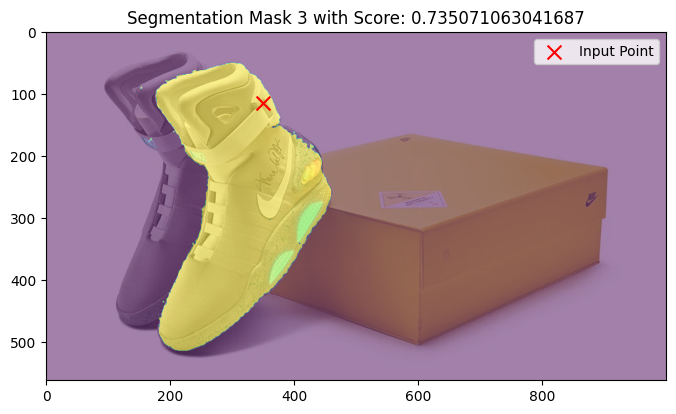

In [22]:
# Initialize the model with the input image
from segment_anything import sam_model_registry, SamPredictor
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)
mask_predictor = SamPredictor(sam)
mask_predictor.set_image(image_rgb)

# Provide points as input prompt [X,Y]-coordinates
input_point = np.array([[350, 115]])
input_label = np.array([1])


# Predict the segmentation mask at that point
masks, scores, logits = mask_predictor.predict(
point_coords=input_point,
point_labels=input_label,
multimask_output=True,
)

import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have 'image_rgb' loaded

# Visualize the input image
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.scatter(input_point[:, 0], input_point[:, 1], c='red', marker='x', s=100, label='Input Point')
plt.title('Input Image with Input Point')
plt.legend()
plt.show()

# Visualize each segmentation mask
for i, mask in enumerate(masks):
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb, alpha=0.7)
    plt.imshow(mask, cmap='viridis', alpha=0.5)
    plt.scatter(input_point[:, 0], input_point[:, 1], c='red', marker='x', s=100, label='Input Point')
    plt.title(f'Segmentation Mask {i + 1} with Score: {scores[i]}')
    plt.legend()
    plt.show()

In [23]:
languette_plus = masks[0]
languette_plus

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [21]:
chaussure = talon + semelle
chaussure

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [24]:
chaussure2 = talon + semelle + lacets + lacets_plus + languette + languette_plus
chaussure2

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

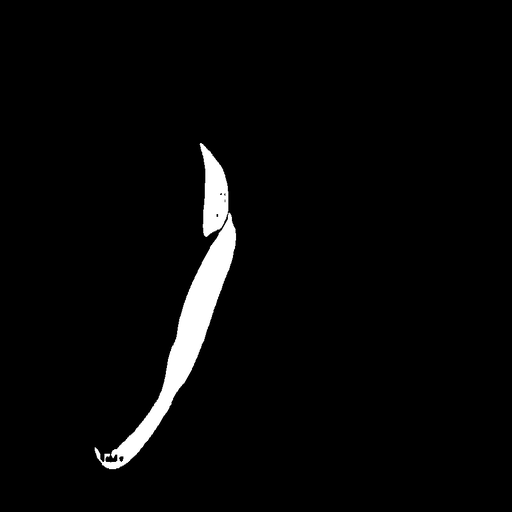

In [47]:
from PIL import Image
import numpy as np

# Assuming 'mask' is a NumPy array representing the segmentation mask

# Convert the mask to a black and white image
binary_mask = (chaussure > 0.5).astype(np.uint8)  # Assuming the mask is in [0, 1] range
binary_mask *= 255  # Scale to [0, 255] for PIL conversion

# Create a PIL Image from the binary mask
pil_image = Image.fromarray(binary_mask, mode='L')  # 'L' mode stands for 8-bit pixels, black and white

# Resize the image to 512x512
new_size = (512, 512)
resized_image = pil_image.resize(new_size, Image.LANCZOS)

# Display or save the PIL Image as needed
resized_image

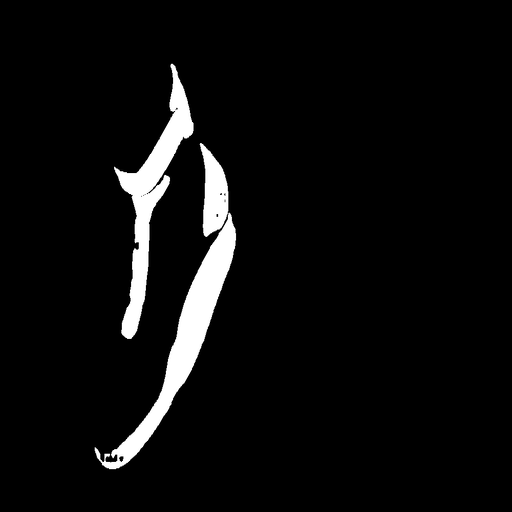

In [25]:
from PIL import Image
import numpy as np

# Assuming 'mask' is a NumPy array representing the segmentation mask

# Convert the mask to a black and white image
binary_mask = (chaussure2 > 0.5).astype(np.uint8)  # Assuming the mask is in [0, 1] range
binary_mask *= 255  # Scale to [0, 255] for PIL conversion

# Create a PIL Image from the binary mask
pil_image = Image.fromarray(binary_mask, mode='L')  # 'L' mode stands for 8-bit pixels, black and white

# Resize the image to 512x512
new_size = (512, 512)
resized_image = pil_image.resize(new_size, Image.LANCZOS)

# Display or save the PIL Image as needed
resized_image

In [26]:
resized_image.save('nike-air-mag-2-mask2.jpg')